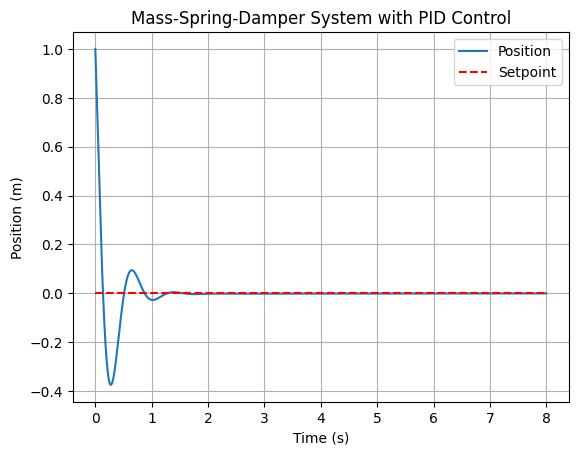

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Mass-Spring-Damper System Parameters
m = 0.5  # Mass (kg)
k = 15.0  # Spring constant (N/m)
c = 0.5  # Damping coefficient (Ns/m)

# PID Controller Parameters
Kp = 25.0  # Proportional gain
Ki = 12.0  # Integral gain
Kd = 3.0   # Derivative gain

# Simulation Parameters
dt = 0.02  # Time step (seconds)
total_time = 8.0  # Total simulation time (seconds)
num_steps = int(total_time / dt)

# Initial Conditions
x0 = 1.0  # Initial position (m)
v0 = 0.0  # Initial velocity (m/s)

# Reference Position (Setpoint)
setpoint = 0.0  # The desired position (m)

# Lists to store data for plotting
time = [0.0]
position = [x0]

# Initialize PID controller error terms
integral = 0.0
previous_error = 0.0

# Simulation Loop
x = x0
v = v0

for _ in range(num_steps):
    # Calculate control input using PID control
    error = setpoint - x
    integral += error * dt
    derivative = (error - previous_error) / dt

    control_input = Kp * error + Ki * integral + Kd * derivative

    # Equations of motion (Newton's second law)
    acceleration = (control_input - c * v - k * x) / m
    v += acceleration * dt
    x += v * dt

    # Store data for plotting
    time.append(time[-1] + dt)
    position.append(x)

    previous_error = error

# Plot the results
plt.figure()
plt.plot(time, position, label='Position')
plt.plot([0, total_time], [setpoint, setpoint], 'r--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Mass-Spring-Damper System with PID Control')
plt.legend()
plt.grid(True)
plt.show()
